In [531]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [532]:
df = pd.read_csv('heart-disease.csv')


In [533]:
#rename colums some are hard to understand
df.rename(columns={'trestbps': 'restbp', 
                   'cp': 'Chest_Pain_Type', 
                   'fbs':'Fast_BS', 
                   'exang':'Ex_Angina', 
                   'thalach': 'max_hr', 
                   'target':'diagnosed'},
                   inplace=True)

#check for null values - no null values
print(df.isnull().sum())

df.head(10)

age                0
sex                0
Chest_Pain_Type    0
restbp             0
chol               0
Fast_BS            0
restecg            0
max_hr             0
Ex_Angina          0
oldpeak            0
slope              0
ca                 0
thal               0
diagnosed          0
dtype: int64


,age,sex,Chest_Pain_Type,restbp,chol,Fast_BS,restecg,max_hr,Ex_Angina,oldpeak,slope,ca,thal,diagnosed
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [534]:
X = df.drop(columns=['diagnosed'])
y = df['diagnosed']

df.columns

Index(['age', 'sex', 'Chest_Pain_Type', 'restbp', 'chol', 'Fast_BS', 'restecg',
       'max_hr', 'Ex_Angina', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosed'],
      dtype='object')

# Explore the data
all data is numerical makes process much easier

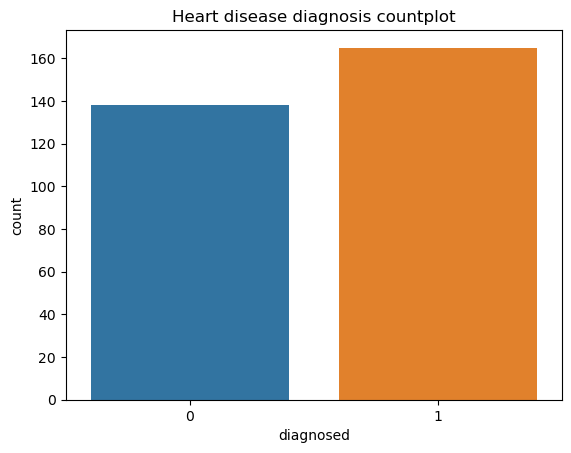

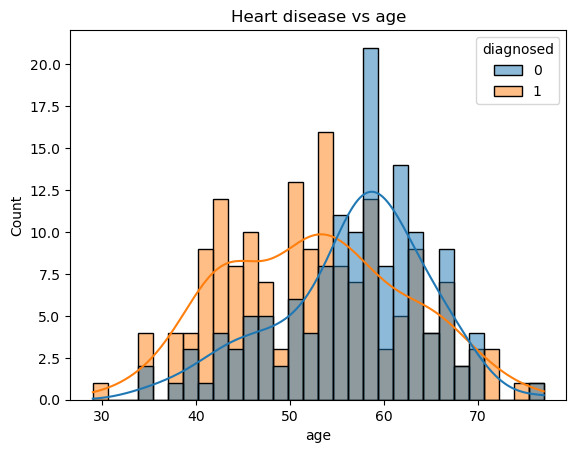

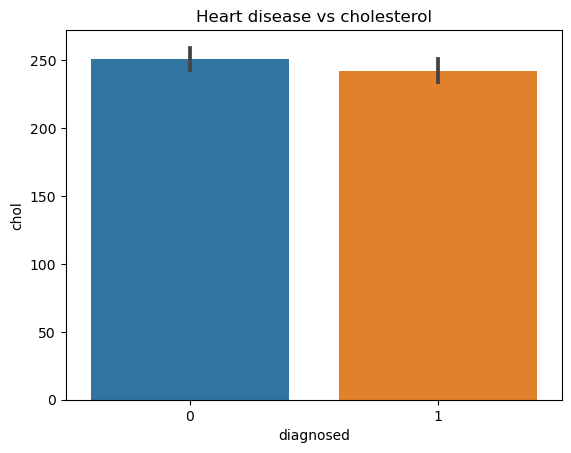

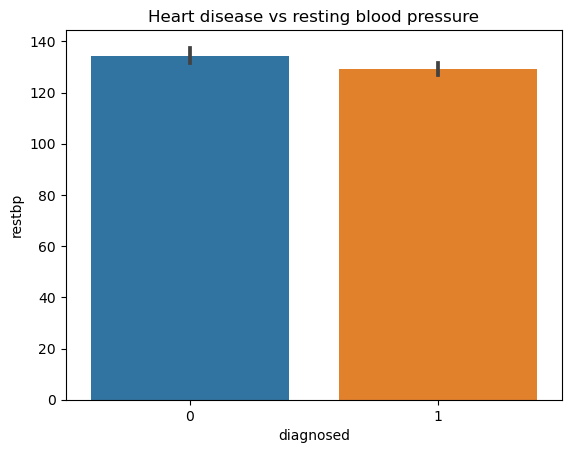

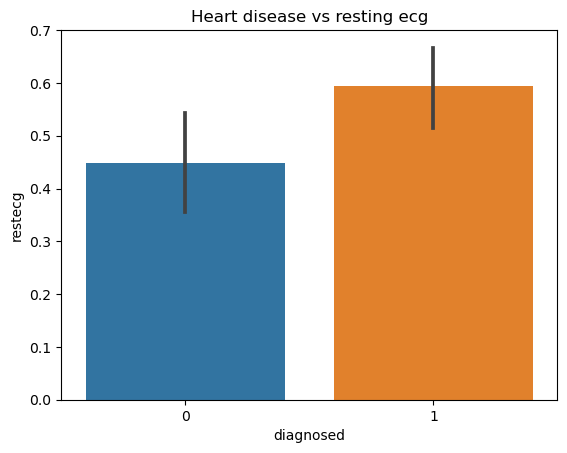

In [535]:
#check diagnosis vs no diagnosis in dataset
sns.countplot(x = 'diagnosed', data=df)
plt.title('Heart disease diagnosis countplot')
plt.show()

#Checj relation between age and heart disease

sns.histplot(x = 'age', hue='diagnosed', data = df, kde=True,bins=30)
plt.title('Heart disease vs age')
plt.legend = True
plt.show()

#relation between age cholesterol blood pressure relate to heart disease
sns.barplot(x = 'diagnosed', y = 'chol',data=df)
plt.title('Heart disease vs cholesterol')
plt.legend = True
plt.show()

sns.barplot(x = 'diagnosed', y = 'restbp',data=df)
plt.title('Heart disease vs resting blood pressure')
plt.legend = True
plt.show()

sns.barplot(x = 'diagnosed', y = 'restecg',data=df)
plt.title('Heart disease vs resting ecg')
plt.legend = True
plt.show()

Correlation Plot

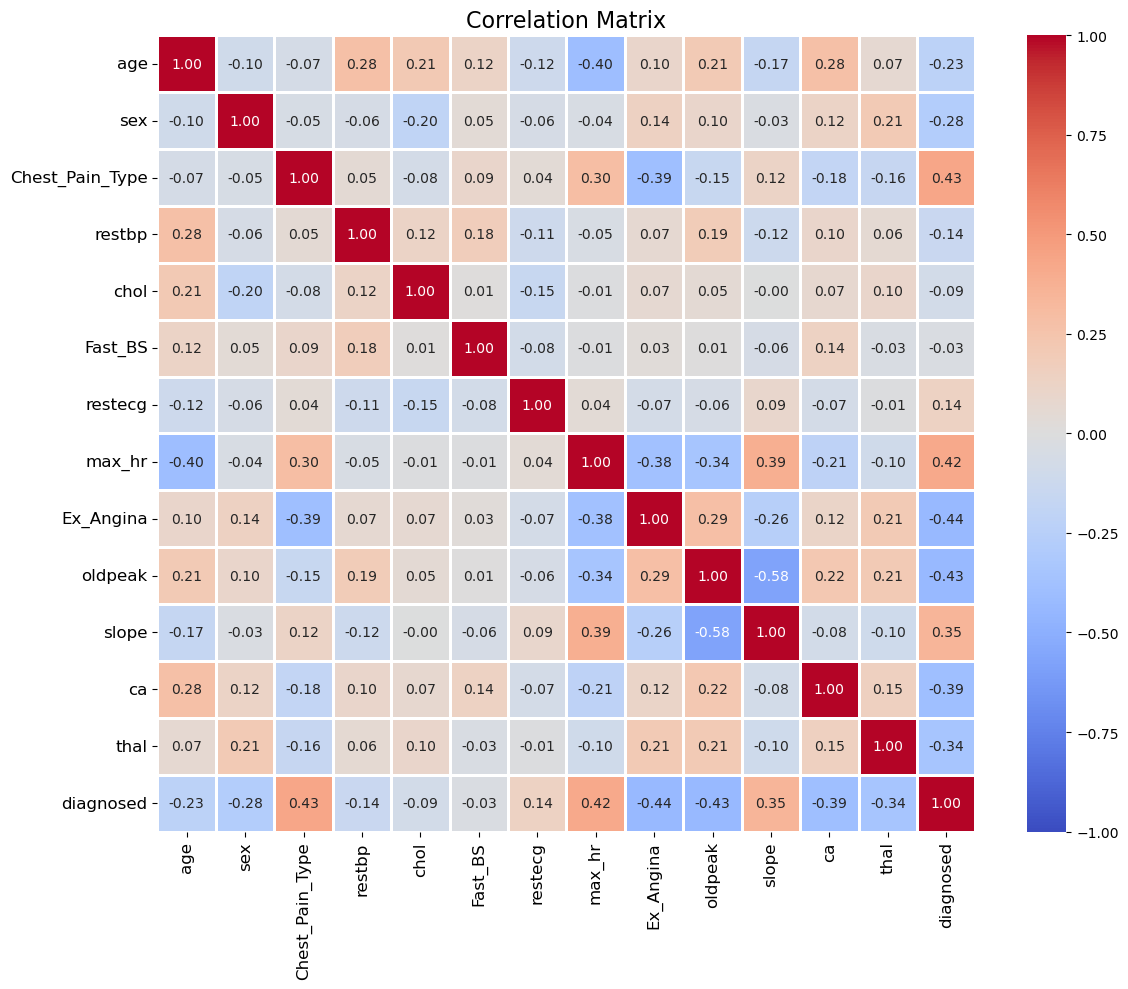

In [536]:

corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.tight_layout()
plt.show()


# Data is clean, split data

In [537]:
#create device
#device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
device = 'cpu'

In [538]:
#scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [539]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=42)

#convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

In [540]:
class LogisticClassifier(nn.Module):
    def __init__(self, in_features, hidden_features, output_features):
        super(LogisticClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_features, 32)
        self.fc3 = nn.Linear(32, output_features)

    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x= self.fc3(x)

        return x

in_features = X.shape[1]
out_features = 1
hidden_features = 90


print(f'In Features: {in_features}, out features: {out_features}')

In Features: 13, out features: 1


In [541]:
model = LogisticClassifier(in_features, hidden_features, out_features).to(device) #instance of model

optimiser = optim.Adam(model.parameters(), lr = 0.1)
criterion = nn.BCEWithLogitsLoss()

In [542]:
num_epochs = 50


for epoch in range(num_epochs):
    model.train()
    outputs  = model(X_train)
    loss = criterion(outputs, y_train)

    # backpropogation
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    if(epoch+1) % 100 ==0:
        print(f'epoch {epoch+1} , loss {loss:.9f}')


In [543]:
model.eval()

with torch.inference_mode():
    y_pred = model(X_test)
    y_pred = (torch.sigmoid(y_pred)).round()

    accuracy = (y_pred.eq(y_test).sum()/float(y_test.shape[0])).item()

    print(f'Accuracy: {accuracy}')

Accuracy: 0.8524590134620667
